Importing all neccesary librarys

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
import xgboost

from sklearn import metrics
from sklearn.metrics import mean_squared_error

#1. Load and Explore Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/sync intern/week three/boston.csv')

In [3]:
df = df.rename(columns={'MEDV' : 'PRICE'})

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##checking missing values

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

there is no missing values

## Finding out the correlation between the features

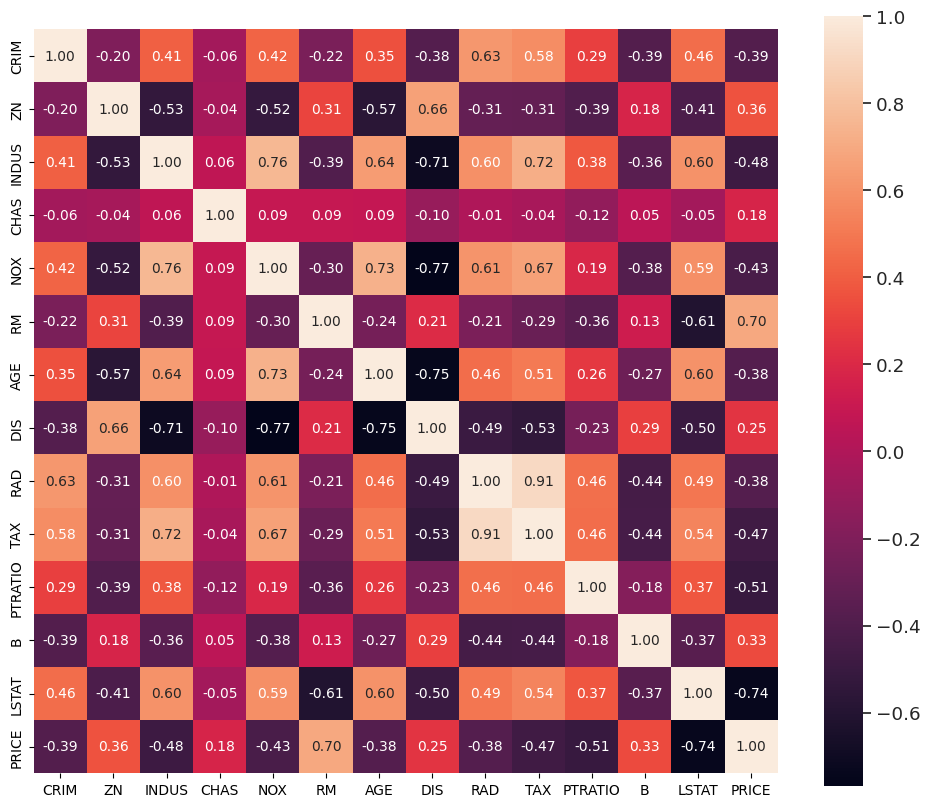

In [7]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10})
plt.show()

RM, PTRATIO, and LSTAT are highly correlated with MEDV (coefficient > 0.5 or < -0.5)

#2. Data Preparation

In [8]:
X = df.drop('PRICE', axis = 1).values
y = df['PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
print("X train: ", X_train.shape )
print("X test: ", X_test.shape )

X train:  (404, 13)
X test:  (102, 13)


## Standardize features

In [10]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#3. Regression Analysis

##3.1 Linear regression




In [11]:
# Initiate the model
reg = LinearRegression()

# Fit the model
reg.fit(X_train, y_train)

# Cross validation
reg_cv_results_train = cross_val_score(reg, X_train, y_train, cv=5)
print("Linear Regression (Train): ", np.mean(reg_cv_results_train))

reg_cv_results_test = cross_val_score(reg, X_test, y_test, cv=5)
print("Linear Regression (Test): ", np.mean(reg_cv_results_test))

Linear Regression (Train):  0.7244357342240261
Linear Regression (Test):  0.5451790940964922


##3.2 Decision Tree Regression

In [12]:
# Initiate model
dt = DecisionTreeRegressor()

# Fit the model
dt.fit(X_train, y_train)

# Cross validation
dt_cv_results_train = cross_val_score(dt, X_train, y_train, cv=5)
print("Decision Tree (Train): ", np.mean(dt_cv_results_train))

dt_cv_results_test = cross_val_score(dt, X_test, y_test, cv=5)
print("Decision Tree (Test): ", np.mean(dt_cv_results_test))

Decision Tree (Train):  0.625248483952997
Decision Tree (Test):  0.5935220520484474


##3.3 Random Forest Classifier

In [13]:
# Initiate model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X_train, y_train)

# Cross validation
rf_cv_results_train = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest (Train): ", np.mean(rf_cv_results_train))

rf_cv_results_test = cross_val_score(rf, X_test, y_test, cv=5)
print("Random Forest (Test): ", np.mean(rf_cv_results_test))

Random Forest (Train):  0.8188931882643494
Random Forest (Test):  0.6988660215434362


##3.4 XGBoost Regresso

In [14]:
# Initiate model
xgb = XGBRegressor()

# Fit the model
xgb.fit(X_train, y_train)

# Cross validation
xgb_cv_results_train = cross_val_score(xgb, X_train, y_train, cv=5)
print("XGBoost (Train): ", np.mean(xgb_cv_results_train))

xgb_cv_results_test = cross_val_score(rf, X_test, y_test, cv=5)
print("XGBoost (Test): ", np.mean(xgb_cv_results_test))

XGBoost (Train):  0.8426447064853209
XGBoost (Test):  0.6997678322355659


In [15]:
results_table = pd.DataFrame([[np.mean(reg_cv_results_train), np.mean(reg_cv_results_test)],
                             [np.mean(dt_cv_results_train), np.mean(dt_cv_results_test)],
                             [np.mean(rf_cv_results_train), np.mean(rf_cv_results_test)],
                             [np.mean(xgb_cv_results_train), np.mean(xgb_cv_results_test)]],
                            columns=['Train R2', 'Test R2'],
                            index=["Linear Regression","Decision Tree","Random Forest", "XGBoost Regressor"])
pd.options.display.precision = 3
results_table

,Train R2,Test R2
Linear Regression,0.724,0.545
Decision Tree,0.625,0.594
Random Forest,0.819,0.699
XGBoost Regressor,0.843,0.700


In [16]:
results_table['Difference'] = results_table['Train R2'] - results_table['Test R2']

In [17]:
results_table

,Train R2,Test R2,Difference
Linear Regression,0.724,0.545,0.179
Decision Tree,0.625,0.594,0.032
Random Forest,0.819,0.699,0.120
XGBoost Regressor,0.843,0.700,0.143


## 🎇All models seem to be overfitting but Decision Tree achieved the best performance.